# Molecular-dynamics simulations of macromolecular diffraction, part II: Analysis of protein crystal simulations, diffuse Jupyter notebook

 
$\text{David Wych}^{1,2}, \text{Michael E. Wall}^{1}$

1. Computer, Computational and Statistical Sciences Division, Los Alamos National Laboratory, Los Alamos, NM 87545, USA
2. Center for Nonlinear Studies, Los Alamos National Laboratory, Los Alamos, NM 87545, USA

## Processing a trajectory for diffuse scattering calculation

Please see the Bragg analysis notebook for information about how to process the trajectory for analysis.

## Calculating diffuse scattering from an MD trajectory

Now let's switch gears and calculate the actual scattering from a simulation.

To do this, we're going to use a piece of software called `xtraj.py` in the `lunus` software suite for diffuse scattering. 

This script uses the coordiantes of the atoms, their atomic scattering factors, and the scattering equations to calculate the Bragg and Diffuse scattering predicted by the MD trajectory.

For the diffuse scattering the script uses Guinier's Equation:

$$I_{D} = \langle | F_{\text{crystal}} - \langle F_{\text{crystal}} \rangle |^{2} \rangle $$

where the diffuse intensity is the average scattering due to the difference of the stucture factors from the average.

To use the program to calcualte the diffuse scattering, we just let the program use the cell information from the supercell, which will give us a P1 space group for the supercell.

To calculate the Bragg scattering, we give `xtraj.py` the *real unit* cell box and space group information, and let it fold everything back on to the asymmetric unit, so we can examine the density superimposed on the protein structure.

*The unique thing about doing this analysis with MD is that we can calculate the density for the protein and solvent **separately**!*

---

We're going to need to collect the supercell side length and angle information from the CRYST1 record of the x-ray structure for later:

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open("./data/4wor_complete.pdb", 'r') as f:
    for line in f.readlines():
        if line[:6] == "CRYST1":
            with open("cell.txt", 'w') as f:
                a,b,c,alpha,beta,gamma = line.split()[1:7]
                f.write("{:.3f},{:.3f},{:.3f},{:.2f},{:.2f},{:.2f}".format(2*float(a),2*float(b),2*float(c),
                                                                     float(alpha),float(beta),float(gamma)))
                print("{:.3f},{:.3f},{:.3f},{:.2f},{:.2f},{:.2f}".format(2*float(a),2*float(b),2*float(c),
                                                                     float(alpha),float(beta),float(gamma)))

96.998,96.998,126.860,90.00,90.00,90.00


If we run xtraj without providing a unit cell and space group, lunus will read the information from the top of the topology file -- in this case, the cell and and space group information for a supercell, which is P1.

In [3]:
xtraj=os.path.join(os.environ.get('LUNUS_PATH'),"lunus/command_line/xtraj.py")

In [4]:
!python {xtraj} \
        traj="trajectory.xtc" \
        top="crystal.pdb" \
        d_min=1.6 first=0 last=50 selection="all" diffuse=diffuse_supercell.hkl \
        fcalc=fcalc_supercell.mtz icalc=icalc_supercell.mtz

f_000 = 469990, volume = 1.19358e+06
TIMING: md.iterload =  2.371751308441162
Number of atoms in topology file =  129462
Rank  0  processed chunk  1  of  1
Rank  0  is done with individual calculations
TIMING: Calculate individual statistics =  79.81180119514465
TIMING: Reduction =  1.4578180313110352
TIMING: Total diffuse calculation =  78.8520438671112
Average Icalc:
 -60   -8    1    503215.88
 -60   -8    2    439694.19
 -60   -8    3    607274.38
 -60   -8    4    406870.24
 -60   -7    1    439702.61
 -60   -7    2    597343.05
 -60   -7    3    521224.58
 -60   -7    4    705288.33
 -60   -7    5    558011.31
 -60   -7    6    653130.11
 -60   -6    1    663376.98
Diffuse:
 -60   -8    1    391611.83
 -60   -8    2    413868.52
 -60   -8    3    406707.50
 -60   -8    4    378152.71
 -60   -7    1    390487.64
 -60   -7    2    519192.37
 -60   -7    3    482929.59
 -60   -7    4    579649.96
 -60   -7    5    397253.97
 -60   -7    6    548735.83
 -60   -6    1    517351.72


In [5]:
!python {xtraj} \
        traj="trajectory.xtc" \
        top="crystal.pdb" \
        d_min=1.6 first=0 last=50 selection="resname SOL" \
        diffuse=diffuse_supercell_wat.hkl \
        fcalc=fcalc_supercell_wat.mtz icalc=icalc_supercell_wat.mtz

f_000 = 171372, volume = 1.19358e+06
TIMING: md.iterload =  2.3296520709991455
Number of atoms in topology file =  129462
Rank  0  processed chunk  1  of  1
Rank  0  is done with individual calculations
TIMING: Calculate individual statistics =  53.3501079082489
TIMING: Reduction =  1.4150972366333008
TIMING: Total diffuse calculation =  52.39787721633911
Average Icalc:
 -60   -8    1    217823.80
 -60   -8    2    224121.96
 -60   -8    3    196776.81
 -60   -8    4    199629.90
 -60   -7    1    187425.46
 -60   -7    2    197612.65
 -60   -7    3    299782.12
 -60   -7    4    234118.90
 -60   -7    5    225820.76
 -60   -7    6    283695.84
 -60   -6    1    282392.21
Diffuse:
 -60   -8    1    214984.03
 -60   -8    2    212955.48
 -60   -8    3    196137.85
 -60   -8    4    198911.32
 -60   -7    1    182023.74
 -60   -7    2    179544.12
 -60   -7    3    298946.16
 -60   -7    4    207101.70
 -60   -7    5    198274.81
 -60   -7    6    278856.84
 -60   -6    1    282236.17


In [6]:
!python {xtraj} \
        traj="trajectory.xtc" \
        top="crystal.pdb" \
        d_min=1.6 first=0 last=50 selection="not resname SOL" \
        diffuse=diffuse_supercell_prot.hkl \
        fcalc=fcalc_supercell_prot.mtz icalc=icalc_supercell_prot.mtz

f_000 = 298618, volume = 1.19358e+06
TIMING: md.iterload =  2.3161540031433105
Number of atoms in topology file =  129462
Rank  0  processed chunk  1  of  1
Rank  0  is done with individual calculations
TIMING: Calculate individual statistics =  62.315168142318726
TIMING: Reduction =  1.488318920135498
TIMING: Total diffuse calculation =  61.450111865997314
Average Icalc:
 -60   -8    1    279493.21
 -60   -8    2    215861.22
 -60   -8    3    476409.84
 -60   -8    4    196703.71
 -60   -7    1    265792.95
 -60   -7    2    293379.47
 -60   -7    3    244212.63
 -60   -7    4    396749.16
 -60   -7    5    237278.79
 -60   -7    6    383856.64
 -60   -6    1    339784.82
Diffuse:
 -60   -8    1    192406.14
 -60   -8    2    212731.70
 -60   -8    3    253382.94
 -60   -8    4    162878.82
 -60   -7    1    195159.25
 -60   -7    2    248461.73
 -60   -7    3    199058.45
 -60   -7    4    318933.41
 -60   -7    5    180511.62
 -60   -7    6    286960.18
 -60   -6    1    189359.78


The `lunus` software package contains many methods that may be used to analyze and process diffuse scattering data.  To use these methods, we're going to need to convert the diffuse scattering files in the flat text `.hkl` format to the internal binary format for `lunus` which is a `.lat` file. To do this using `lunus`, we'll need a `.lat` template. If experimental data are not avaiable, a template can be created with the following command using the `supercell_cell.txt` file created above.

In [7]:
# !lunus.makelt template.lat $(cat cell.txt) 1.6

Below, we use the experimental data in the `.lat` format, provided in the `data/` directory, as a template. 

In [8]:
%%capture
!lunus.hkl2lat diffuse_supercell.hkl diffuse_supercell.lat experimental_data.lat
!lunus.hkl2lat diffuse_supercell_wat.hkl diffuse_supercell_wat.lat experimental_data.lat
!lunus.hkl2lat diffuse_supercell_prot.hkl diffuse_supercell_prot.lat experimental_data.lat

To visualize the .lat data in python (and to make it available for other potential analyses beyond what we perform using `lunus`), now we introduce a function `read_lat()` which uses native `python` and `numpy` methods to read in these files as byte arrays, and outputs both the information from the header, and the lattice itself (stored as a `numpy` array): The native internal data structure for packaging diffuse scattering maps in this software package is the binary `.lat` file.

In [9]:
import struct

def read_lat(filename):
    # open and read the file, then store it as a bytearray
    fh = open(filename, "rb")
    ba = bytearray(fh.read())
    # The first 36 bytes are information about the data
    Nx,Ny,Nz,xlo,xhi,ylo,yhi,zlo,zhi=struct.unpack('=IIIffffff',ba[0:36])
    svu=np.sqrt(((xhi-xlo)/Nx)**2+((yhi-ylo)/Ny)**2+((zhi-zlo)/Nz)**2)
    header_info = (Nx, Ny, Nz, xlo, xhi, ylo, yhi, zlo, zhi, svu)
    print(f"Dimensions\n----------\n x: {Nx}, y: {Ny}, z:{Nz}")
    print(f"Data bounds\n-----------\n x: ({xlo:.4f},{xhi:.4f})\n y: ({ylo:.4f},{yhi:.4f})\n z: ({zlo:.4f},{zhi:.4f})")
    print(f"\nOrthogonal scattering vector length of a grid diagonal: {svu}")
    # Load the rest of the file in to a numpy array
    arr=np.frombuffer(ba[36:],dtype=np.float32)
    # reshape to a matrix Nx by Ny by Nz
    lat=np.reshape(arr,(Nz,Ny,Nx))
    return header_info, lat

With the file loaded in as a `numpy` array, we can use `matplotlib`'s `imshow` to view the diffuse scattering. Here we read the experimental data file and take a slice through the middle of the z-axis (as the z-axis is 160 elements, the middle is the 80th slice). (Also, the value -32767 is used as a tag that indicates that data should be ignored, so we set all elements of the image slice through the array with that value to zero).

Dimensions
----------
 x: 122, y: 122, z:160
Data bounds
-----------
 x: (-0.6183,0.6286)
 y: (-0.6183,0.6286)
 z: (-0.6221,0.6299)

Orthogonal scattering vector length of a grid diagonal: 0.016436114807369794


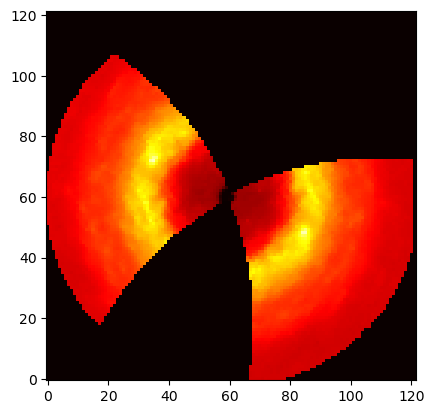

In [10]:
header, lattice = read_lat("experimental_data.lat")
im=1.*lattice[80]
im[im == -32767.0] = 0
plt.imshow(im,vmin=0,vmax=3500, cmap=plt.cm.hot, origin="lower");

In [11]:
h,diffuse = read_lat("diffuse_supercell.lat")
h,diffuse_wat = read_lat("diffuse_supercell_wat.lat")
h,diffuse_prot = read_lat("diffuse_supercell_prot.lat")

Dimensions
----------
 x: 122, y: 122, z:160
Data bounds
-----------
 x: (-0.6183,0.6286)
 y: (-0.6183,0.6286)
 z: (-0.6221,0.6299)

Orthogonal scattering vector length of a grid diagonal: 0.016436114807369794
Dimensions
----------
 x: 122, y: 122, z:160
Data bounds
-----------
 x: (-0.6183,0.6286)
 y: (-0.6183,0.6286)
 z: (-0.6221,0.6299)

Orthogonal scattering vector length of a grid diagonal: 0.016436114807369794
Dimensions
----------
 x: 122, y: 122, z:160
Data bounds
-----------
 x: (-0.6183,0.6286)
 y: (-0.6183,0.6286)
 z: (-0.6221,0.6299)

Orthogonal scattering vector length of a grid diagonal: 0.016436114807369794


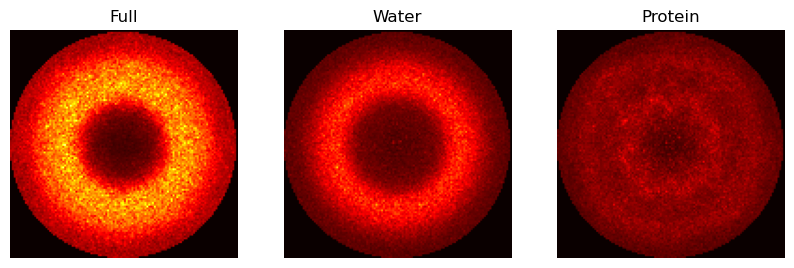

In [12]:
f, ax = plt.subplots(figsize=(10,10), ncols=3)
import matplotlib.colors
ax[0].imshow(diffuse[80], vmax=0.95*diffuse.max(), cmap=plt.cm.hot, origin="lower")
ax[0].set_title("Full")
ax[0].set_axis_off()
ax[1].imshow(diffuse_wat[80], vmax=0.95*diffuse.max(), cmap=plt.cm.hot, origin="lower")
ax[1].set_title("Water")
ax[1].set_axis_off()
ax[2].imshow(diffuse_prot[80], vmax=0.95*diffuse.max(), cmap=plt.cm.hot, origin="lower")
ax[2].set_title("Protein")
ax[2].set_axis_off()

The figure above compares the full diffuse scattering with the scattering from the water and protein components of the system.

## Comparing the simulated and experimental diffuse intensities

### Comparing the isotropic diffuse scattering

The isotropic diffuse scattering is a familiar form of diffuse scattering that is ubiquotous in protein crystallography. We can calculate it by averaging the diffuse signal in resolution shells. First, we illustrate a way to do this using experimental and simulated data from the Wych et al. 2019 Structural Dynamics paper. These files are available in the `data/` directory in the `lunus` internal `.lat` binary format. The method makes use of `lunus.avgrlt` to take averages of the data in the `.lat` file in spherical shells eminating from the origin. These are stored in a `.rf` binary file (a simple legacy format from the Sol Gruner lab 1990s) which is converted to a `.dat` text file for plotting using `lunus.binasc`.

Below we use the code `calc_isotropic.sh` which takes in a `.lat` file, and uses `lunus.avgrlt` and `lunus.binasc` methods to calcualte the isotropic profile, and output the data in resolution bins in an ASCII `.dat` format, which we can then plot.

`calc_isotropic.sh`
```bash
#!/bin/bash

# arguments:
# 1: diffuse .lat file

IN=$1

lunus.avgrlt $IN ${IN%.lat}_isotropic.rf $(cat cell.txt)
lunus.binasc 2 < ${IN%.lat}_isotropic.rf > ${IN%.lat}_isotropic.dat
```

We calculate the isotropic signal from both the simulated and experimental diffuse data, and then plot them, scaling the simulated data. We're going to multiply the x-axis by the grid diagonal scattering vector length in the header info returned by read_lat().

In [13]:
%%capture
!bash ./code/calc_isotropic.sh simulated_data.lat
!bash ./code/calc_isotropic.sh experimental_data.lat

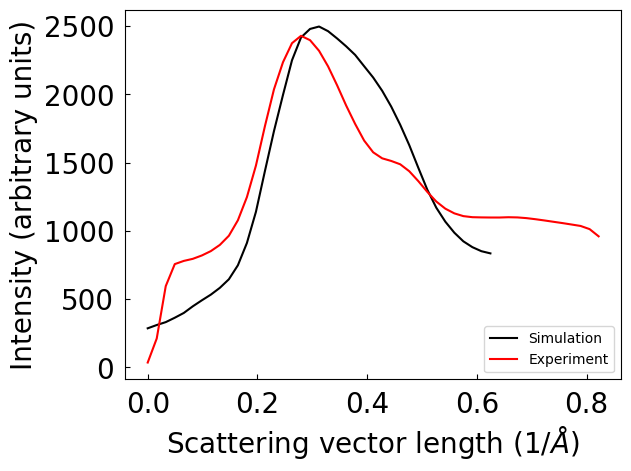

In [14]:
svu = header[9]
q_sim, iso_sim = np.loadtxt("simulated_data_isotropic.dat").T
q_exp, iso_exp = np.loadtxt("experimental_data_isotropic.dat").T

f, ax = plt.subplots()

ax.plot(q_sim*svu, iso_sim/550., c="k",label="Simulation")
ax.plot(q_exp*svu, iso_exp, c="r",label="Experiment")
ax.set_xlabel(r"Scattering vector length (1/$\AA$)", size=20)
ax.set_ylabel("Intensity (arbitrary units)", size=20)
ax.tick_params(axis="both", direction="in", labelsize=20, pad=8)
ax.legend(loc="lower right")

The isotropic diffuse signal is sometimes called the "solvent ring" because it is assumed to result from scattering from the solvent. Let's investigate how true this assumption is, using our simulated diffuse intensities computed from the MD simulation (note: the trajectory we are analyzing is quite short -- 50ns; however the analysis we show here is consistent with similar analysis on much longer trajectories \[see [Wall 2014](https://www.pnas.org/doi/abs/10.1073/pnas.1416744111)\]).

The following will convert the simulated diffuse scattering files in the `.hkl` format to files in the `.lat` format using `hkl2lat` and compute the isotropic components of each file.

In [15]:
%%capture


!bash ./code/calc_isotropic.sh diffuse_supercell.lat
!bash ./code/calc_isotropic.sh diffuse_supercell_wat.lat
!bash ./code/calc_isotropic.sh diffuse_supercell_prot.lat

Now plot the results.

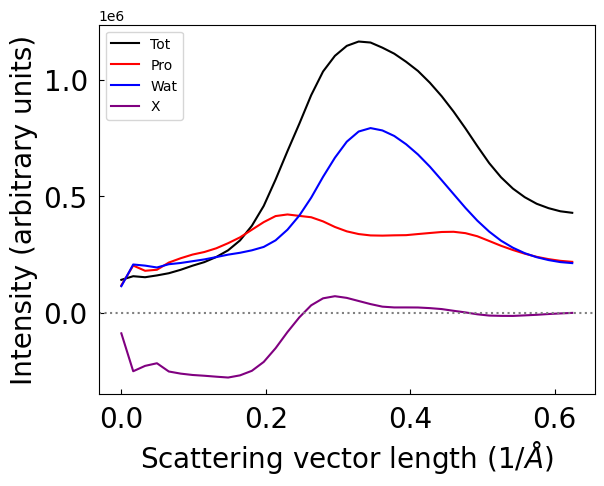

In [16]:
q, iso = np.loadtxt("diffuse_supercell_isotropic.dat").T
q_wat, iso_wat = np.loadtxt("diffuse_supercell_wat_isotropic.dat").T
q_prot, iso_prot = np.loadtxt("diffuse_supercell_prot_isotropic.dat").T
q_cross = q
iso_cross = iso - iso_wat - iso_prot

f, ax = plt.subplots()

ax.plot(q*svu, iso, c="k", label="Tot")
ax.plot(q_prot*svu, iso_prot, c="r", label="Pro")
ax.plot(q_wat*svu, iso_wat, c="b", label="Wat")
ax.plot(q_cross*svu, iso_cross, c="Purple", label="X")
ax.axhline(0, c="Grey", ls=":")
ax.legend(loc="upper left")
ax.set_xlabel(r"Scattering vector length (1/$\AA$)", size=20)
ax.set_ylabel("Intensity (arbitrary units)", size=20)
ax.tick_params(axis="both", direction="in", labelsize=20, pad=8)

Notice that the isotropic scattering has contributions from both the protein and solvent, as well as a substantial protein-solvent cross term.

---

It's worth noting, before we move on, that the crystalline MD model is currently the only model available which can produce predictions of _both_ the isotropic and anisotropic diffuse scattering. Phenomenological models, including the liquid-like motions (LLM) model, rigid-body motions (RBM) model, and elastic-network/normal-models (EN/NM) models, so far only have been designed to model the anisotropic diffuse scattering. The crystalline MD model can predict both. However, an important difference between these models is the fact that the LLM, RBM, and EN/NM models are refined against the experimental data, whereas the MD model is not. The only input that the MD model gets from experiment is the structure from which the model is produced. Otherwise, the MD model depends almost entirely on the force field, and the parameters of the simulation (restrained or unrestrained; the solvent model; etc.). At present the phenomenological models show better agreement with the anisotropic data than the MD model.

---

### Quantitative comparison of experimental and simulated diffuse intensity

To quantitatively assess the agreement between experimental and simulated diffuse intensities, we compute Pearson correlation coefficients. We'll do this for the total intensity, but, because the total is dominated by the isotropic component, we also wish to subtract this component and analyze the residual, which is the *anisotropic* diffuse scattering. This component of the diffuse scattering is of interest because it results mainly from scattering from the protein only (rather than from the solvent, or protein-solvent dynamics). So, by studying the anisotropic diffuse scattering, one can more specifically assess how well the MD model reproduces the diffuse scattering from the protein.  

---

To illustrate this comparison we use the simulated and experimental data from our 2019 Structural Dynamics paper (a 400ns 2x2x2 simulation of *staphyloccocal nuclease* using the `CHARMM27` force field). First we preprocess the simulation and experiment for the comparison by symmetrizing and truncating to the desired range, determined by the upper resolution of the simulation. 

In [17]:
%%capture
!bash ./code/preprocess.sh experimental_data.lat -3 200. 1.6 $(cat cell.txt)
!bash ./code/preprocess.sh simulated_data.lat -3 200. 1.6 $(cat cell.txt)

Let's inspect a slice through the symmetrized lattices, comparing the simulation to the experiment. First we'll use `lunus.subminlt` to subtract the minimum value at each resolution, to highlight the anisotropic features.

In [18]:
!lunus.subminlt experimental_data_culled_sym.lat experimental_data_culled_sym_submin.lat $(cat cell.txt)
!lunus.subminlt simulated_data_culled_sym.lat simulated_data_culled_sym_submin.lat $(cat cell.txt)

Now we use the read_lat() method above to get the lattices in a numpy array, and visualize a slice through the experimental data.

Dimensions
----------
 x: 122, y: 122, z:160
Data bounds
-----------
 x: (-0.6183,0.6286)
 y: (-0.6183,0.6286)
 z: (-0.6221,0.6299)

Orthogonal scattering vector length of a grid diagonal: 0.016436114807369794
Dimensions
----------
 x: 122, y: 122, z:160
Data bounds
-----------
 x: (-0.6183,0.6286)
 y: (-0.6183,0.6286)
 z: (-0.6221,0.6299)

Orthogonal scattering vector length of a grid diagonal: 0.016436114807369794


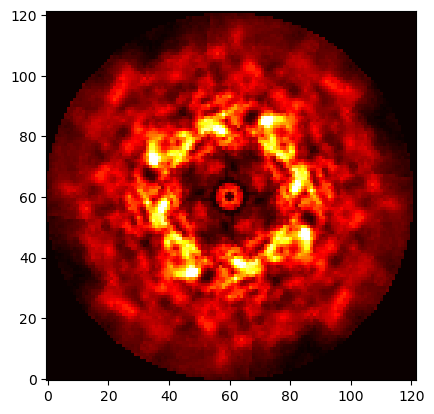

In [19]:
header,exp_sym_lat=read_lat("experimental_data_culled_sym_submin.lat")
header,sim_sym_lat=read_lat("simulated_data_culled_sym_submin.lat")
im_exp=1.*exp_sym_lat[80]
im_exp[im_exp == -32767.0] = 0
plt.imshow(im_exp,vmin=0,vmax=500, cmap=plt.cm.hot, origin="lower");

We can compare this to a slice through the simulation.

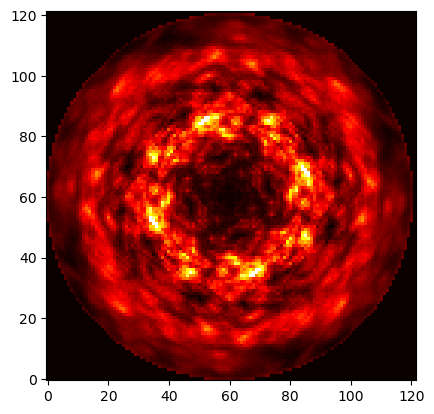

In [20]:
im_sim=1.*sim_sym_lat[80]
im_sim[im_exp == -32767.0] = 0
plt.imshow(im_sim/700.,vmin=0,vmax=700, cmap=plt.cm.hot, origin="lower");

There are features that are shared between these slices, although their agreement isn't perfect. Let's get some quantitative information about how well they agree. First compute the overall correlations for the total and anisotropic components. 

In [21]:
!lunus.corrlt experimental_data_culled_sym.lat simulated_data_culled_sym.lat

0.907549


In [22]:
!lunus.corrlt experimental_data_culled_sym_aniso.lat simulated_data_culled_sym_aniso.lat

0.624053


The correlation of the total is reasonably high, but it includes a large isotropic component. The correlation of the anisotropic component is substantial, but much lower. Both are targets for improvement in the future. 

We now compute the resolution-wise correlation using `lunus.ccrlt` and convert the results to a flat text file for plotting. **Note: It is important to use this method only for the anisotropic component, as the correlation may otherwise be largely due to the variation of the isotropic component within a resolution bin**.

In [23]:
%%capture
!lunus.ccrlt experimental_data_culled_sym_aniso.lat simulated_data_culled_sym_aniso.lat anisotropic_correlation_in_bins.rf $(cat cell.txt)
!lunus.binasc 2 < anisotropic_correlation_in_bins.rf > anisotropic_correlation_in_bins.dat

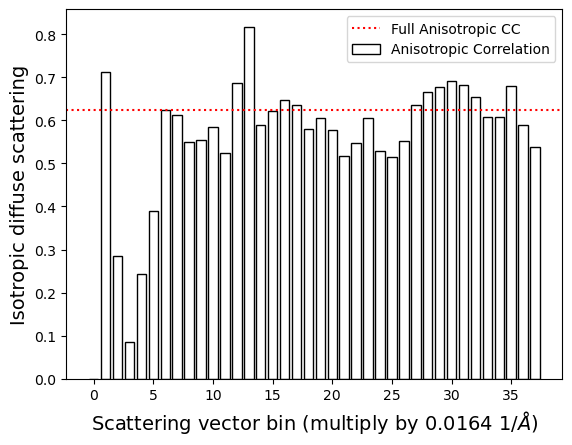

In [24]:
q, corr = np.loadtxt("anisotropic_correlation_in_bins.dat").T
f, ax = plt.subplots()
ax.bar(q,corr,align="center", color="white", edgecolor="k", label="Anisotropic Correlation")
ax.axhline(0.624367, c="r", ls=":", label="Full Anisotropic CC")
ax.set_xlabel(f"Scattering vector bin (multiply by {svu:.4f} 1/$\AA$)", size=14)
ax.set_ylabel("Isotropic diffuse scattering", size=14)
ax.legend();

The correlation is close to the overall correlation above the 6th bin (0.1 1/Angstrom). 

## Analysis of the covariance of atomic displacements from an MD trajectory

### Why compute the covariance?

For the understanding of diffuse scattering, an important quantity to compute is the **variance-covariance matrix of atomic displacements**: $\mathbf{V}_{jk} = \langle \mathbf{u}_{j}\mathbf{u}_{k} \rangle_{t}$ where $\mathbf{u} = \mathbf{r} - \langle \mathbf{r} \rangle_{t}$. This is a 3x3-element symmetric matrix for each pair of atoms in the crystal, whose elements are the displacement covariances of the atoms along each axis. The first row is the x-x, x-y, and x-z displacement covariance of atoms $j$ and $k$ -- that is, the degree to which the displacements about the mean of atoms $j$ and $k$ are correlated with each other: high values indicate that the atoms tend move similarly along the associated axes. 

The variance-covariance matrix of atomic displacements shows up the in the equation for the diffuse intensity ($I_{D}(\mathbf{q})$) from atoms $j$ in unit cells $\mathbf{n}$ and atoms $k$ in unit cells $\mathbf{m}$, under an assumption of harmonic displacements about the atoms' average positions. It is the only variable which is not indpendently known/calculated ($f(q)$) or refined as part of standard Bragg refinement ($\mathbf{R}_n, \langle r_j \rangle, T_{j}(\mathbf{q})$):

$$I_D(\mathbf{q})=\sum_{\mathbf{n}j} \sum_{\mathbf{m}k} f_j(q) f^{\ast}_k(q) e^{i\mathbf{q}\cdot(\mathbf{R}_n-\mathbf{R}_m)}e^{i\mathbf{q}\cdot(⟨\mathbf{r}_j⟩-⟨\mathbf{r}_k⟩)} T_j(\mathbf{q}) T_k(\mathbf{q})\{e^{\mathbf{q}^T \textbf{V}_{\mathbf{n}j\mathbf{m}k}\mathbf{q}}-1\}$$

Besides the diffuse scattering, one might be interested in computing the covariance simply as a means to better understanding the protein's correlated dynamics. For instance, if one wanted to understand the effect of ligand binding on a protein's allosteric network and changes in associated dynamics, one could simulate the protein with and without the ligand bound and look at the difference in the atom-pair covariance matrices to understand how the protein's dynamics change. This can provide a quantitative complement to more qualitative analysis, like simply analyzing the trajectory.

### How the covariance is computed

The MD trajectory consists of a series of coordinates $\mathbf{X}_{t} = (\mathbf{r}_{1}(t), \mathbf{r}_{2}(t), \dots \mathbf{r}_{N}(t))$ for each atom $i$ at each time point $t$ of the simulation.

From this trajectory, we can compute many useful quantities. 

For example: the metric one would use to get a sense for how far the trajectory has strayed from the crystal structure (the starting position) is the root mean square deviation (RMSD) to the crystal structure, at each time point (t) of the trajectory:

$$ \text{RMSD}(\mathbf{X}_t) = \sqrt{ \frac{1}{N} \sum_{n} (\mathbf{r}_{n}(t_i) - \langle \mathbf{r}_{n} \rangle_{t})^{2}} $$

To save on compute, we calculated the covariance for only the backbone $\alpha$-carbons in our system (a crystalline simulation of *staphyloccocal nuclease*) and computed the "atomic covariance" (sometimes called the "total variance") or the sum of the x-x, y-y, and z-z covariances (the $\mathrm{Trace}$ of our matrix $\mathbf{V}_{jk}$), because we want to be able to plot a relationship between the average separation distance and the covariance for each atom pair, and for that we need a single-valued quantity to represent the covariance (as opposed to a matrix).

`GROMACS` provides a way to calculate both the average positions of the atoms and the covariance (or even the atomic covariance) with the same method: `gmx covar`.

`gmx covar` takes the arguments:
- `-f`: the (`.xtc`/`.trr`) trajectory file
- `-s`: the (`.pdb`/`.gro`) structure file
- `-av`: the name of the file for the average positions for the atoms (in, e.g., the `.gro` or `.pdb` format)
- `-ascii`: the name of the output atomic covariance matrix file (in ASCII format)
- `-fit`: perform trajectory fitting

Below is an example command for computing the atomic covariances matrix for the short, example simulation trajectory provided in `/traj_files/` (select the `C-alpha` coordinates for processing). 

However, this trajecotry does not have the sampling or amount of data necessary to produce the results from the *structural Dynamics* paper, so we provide the pre-processed pair-wise distance and atomic-covariance matrices from the full trajectory in `/data/`.

In [25]:
# gmx covar -f traj_files/c_alpha_first_first_100ns_500_frames_fit.xtc -s traj_files/c_alpha_start.pdb -av average_position.pdb -ascii atomic_covariance.dat -fit

With the `average_position.pdb` file in hand, one can load in the positions of the atoms to a numpy array, and compute the pair-wise distances, with a python script like examples script provided in the `/code/` directory: `pairwise_distances.py`.

To select only the alpha carbons from a `.pdb` file, one can use a `python` script like the following (in `/code/`) which processes the file `full_sys_start.pdb` contained in the `/data/` directory, and outputs a pdb file containing only the alpha carbons:

`get_c_alphas.py`
```python
with open("./data/full_sys_start.pdb", 'r') as f:
    with open("full_sys_start_calphas.pdb", 'w') as g:
            for line in f.readlines():
            # keep the CRYST1 record
            if line[:6] == "CRYST1":
                g.write(line)
            # keep the alpha carbons (name CA)
            if line[:4] == "ATOM":
                if line[12:16].strip() == "CA":
                    g.write(line)
            # don't write anything else
            else:
                pass
```

Then one can process the alpha carbon `.pdb` file to get the pairwise distances, correcting for periodic boundary conditions (e.g. atoms very far from each other in the box can, in reality, be very close to each other, modulo the periodic boundary) by using the `python` call below. 

(Remove the comment `#`s in the code blocks below to see what the pairwise distance matrix looks like for the starting structure supercell file provided in `/data/`. Note that this will look very similar to the pairwise distance matrix we use in the analysis below, but it is not the same -- the pairwise distance and atomic covariance matrices used below were calculated from a much longer trajectory, which would have been impractical to include in this tutorial.)

In [26]:
# !python ./code/get_c_alphas.py
# !python ./code/pairwise_distances.py --pdb full_sys_start_calphas.pdb --out pairwise_distances.npy

In [27]:
# import numpy as np
# import matplotlib.pyplot as plt
# np.load("pairwise_distances.npy")
# f, ax = plt.subplots(figsize=(7,7))
# pos = ax.imshow(x, cmap=plt.cm.Blues, origin="lower");
# f.colorbar(pos, fraction=0.046, pad=0.04);
# ax.set_title(r"$\alpha$-carbon atom pair distance ($\AA$)");
# plt.show()

The atomic covariance between atom pairs and the average c-$\alpha$ positions were both computed from an MD trajectory of a 2x2x2 unit cell simulation of *staphyloccocal nuclease* using GROMACS. The atomic covariance and pairwise distances (computed as above) have been stored in `numpy` `.npy` array files in `/data/`. 

Below we plot them:

In [28]:
# atomic covariance is in units of nm² - 1 nm² = 100 Å²
covar = 100*np.load("./data/amber_tot_var_mat.npy")
# distance is in units of nm - 1 nm = 10 Å
dist  =  10*np.load("./data/amber_average_sc_c_alpha_distances_pbc.npy")

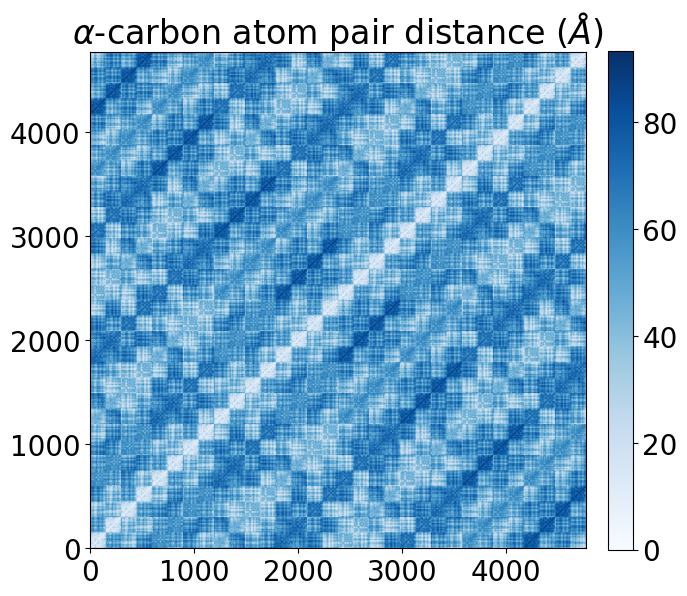

In [29]:
matplotlib.rcParams.update({'font.size': 20})
f, ax = plt.subplots(figsize=(7,7))
pos = ax.imshow(dist, cmap=plt.cm.Blues, origin="lower");
f.colorbar(pos, fraction=0.046, pad=0.04);
ax.set_title(r"$\alpha$-carbon atom pair distance ($\AA$)");

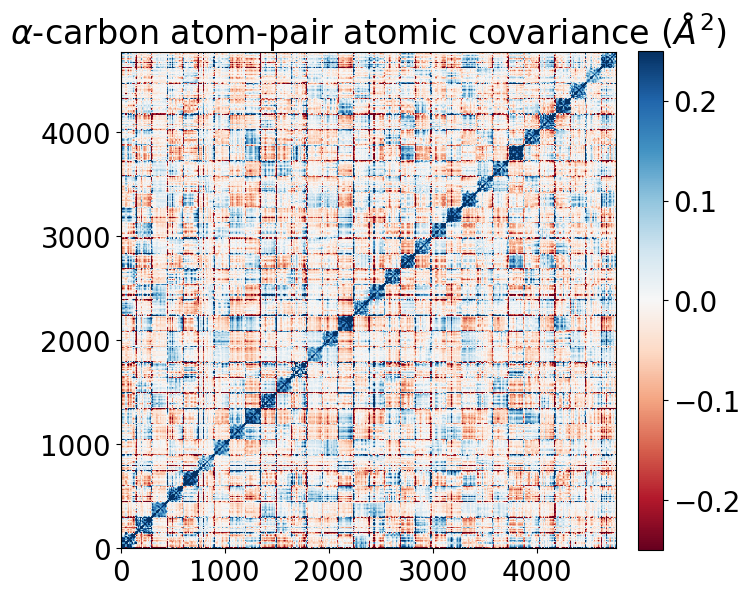

In [30]:
import matplotlib.colors as colors
f,ax = plt.subplots(figsize=(7,7))
pos = ax.imshow(covar, vmin=-0.25, vmax=0.25, cmap=plt.cm.RdBu, origin="lower");
f.colorbar(pos, fraction=0.046, pad=0.04);
ax.set_title(r"$\alpha$-carbon atom-pair atomic covariance ($\AA^{2}$)");
matplotlib.rcParams.update({'font.size': 14})

To see the relationship between covariance and atom-pair distance, we need to match up the elements of the atomic covariance matrix and the average distance matrix. However, because the matrix is symmetric (the average distance between atom 1 and 10 is the same as the average distance between atom 10 and 1 -- and similarly for atomic covariance) we need to look at only the upper triangular elements of each matrix. (We exclude the diagonal because we are not interested in the movement of individual atoms, only the _relative_ movement of atom _pairs_.)

We achieve this by masking out the lower triangular elements and the elements along the diagoal (`numpy`'s `triu_indices` method produces a matrix of indices of size `n` with ones to select the upper triangular elements; the argument `k=1` excludes the diagonal elements (shifts the indices selected up by 1 element). We then use this index mask to select for the desired elements in the `covar` and `dist` matrices, before using `nunpy`'s `flatten` method to convert each matrix into a 1-D array with all of the matrices rows in order.

Plotting the relationship between these flattened arrays is equivalent to matching up and then plotting the replationship between the corresponding elements of each matrix.

In [31]:
# Masking out the lower triangular elements and the diagonal
full_sc_mask = np.zeros((149*32, 149*32), dtype=bool)
full_sc_mask[np.triu_indices(n=149*32, k=1)] = True
# Then flattening each to a list, so they can be compared element-wise in scatter plot
covar_scatter = covar[full_sc_mask].flatten()
dist_scatter  =  dist[full_sc_mask].flatten()

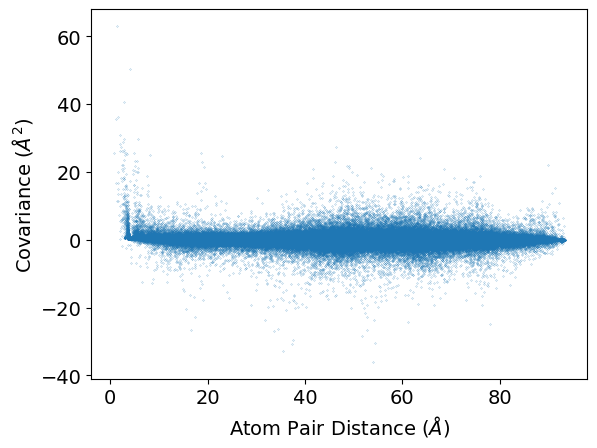

In [32]:
plt.scatter(dist_scatter, covar_scatter, s=0.1, marker=".");
plt.ylabel(r"Covariance ($\AA^2$)", size=14);
plt.xlabel(r"Atom Pair Distance ($\AA$)", size=14);

## Associating covariance information with the LLM and RBM models of diffuse scattering

It's difficult to interpret the scatter plot of covariance vs distance. What we're really interested in is an overall trend for how atomic covariance depends on distance, on average. To get a better sense of this, we're going to need to create bins for ranges of atom-pair separation distance, and collect all of the atomic covariances in each bin. We'll then compute the average atomic covariance in each bin, as well as the standard error on the mean.

In [33]:
from scipy.stats import sem

In [34]:
def collect_bins(dist, covar, n_bins=50):
    dist_bins = np.linspace(np.min(dist), np.max(dist), num=n_bins)
    bin_indices = np.digitize(dist, dist_bins)
    averages = [np.mean(covar[bin_indices == i]) for i in range(1,n_bins)]
    std_e = [sem(covar[bin_indices == i]) for i in range(1,n_bins)]
    dist_bins = dist_bins - (dist_bins[1]-dist_bins[0])/2
    
    return dist_bins[1:], averages, std_e

This function outputs the distance bin, average atomic covariance, and standard error on the mean to a data file, with each value in a separate column.

In [35]:
def output_data(d, c, s, fn="data.txt"):
    with open(fn, "w") as fo:
        for i in range(len(d)):
            fo.write("{:.5f}, {}, {}\n".format(d[i], c[i], s[i]))

In [36]:
Dist, Cov, Cov_err = collect_bins(dist_scatter, covar_scatter)
output_data(Dist, Cov, Cov_err, "AMBER_full_supercell_covar_vs_dist_FULL_DATA_xf.dat")

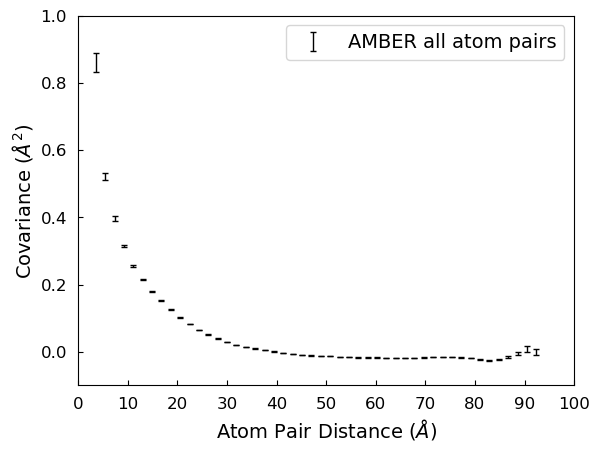

In [37]:
f, ax = plt.subplots()
ax.errorbar(Dist, Cov, yerr=Cov_err, elinewidth=1, capsize=2.5, color="k", linestyle='', label="AMBER all atom pairs")
ax.set_xticks(np.arange(0,110,10))
ax.legend(loc="upper right")
ax.set_ylabel(r"Covariance ($\AA^2$)", size=14)
ax.set_xlabel(r"Atom Pair Distance ($\AA$)", size=14)
ax.tick_params(axis="both", direction="in", labelsize=12, pad=8)
ax.set_ylim([-0.1,1]);
ax.set_xlim([0,100]);

Looks like the relationship is roughly exponential! But we need to check to be sure.

We're going to use `gnuplot`'s `fit` method to compute the parameters for an exponential fit to this data. 

The following writes out a script (`fit.gnu`) that `gnuplot` will run to specify the fit function and the parameters, restrict the fitting to a range of x values, and compute the fit parameters, which are outputted to a `fit.log` file.

In [38]:
with open("fit.gnu", 'w') as g:
    g.write("f(x) = a * exp(-x/g) + b\n")
    g.write("set xrange [5:55.5]\n")
    g.write("fit f(x) \"AMBER_full_supercell_covar_vs_dist_FULL_DATA_xf.dat\" using 1:2:3 via a, g, b\n")

In [39]:
!gnuplot fit.gnu

"fit.gnu" line 3: warning: 
	> Implied independent variable y not found in fit function.
	> Assuming version 4 syntax with zerror in column 3 but no zerror keyword.

iter      chisq       delta/lim  lambda   a             g             b            
   0 9.7248239094e+07   0.00e+00  1.10e+03    1.000000e+00   1.000000e+00   1.000000e+00
   1 1.4761113956e+05  -6.58e+07  1.10e+02    1.000024e+00   1.000152e+00   2.047687e-02
   2 1.3316175292e+05  -1.09e+04  1.10e+01    1.002453e+00   1.015787e+00   8.385406e-03
   3 1.2440382082e+05  -7.04e+03  1.10e+00    1.255163e+00   2.618496e+00   8.375501e-03
   * 1.7571363036e+09   1.00e+05  1.10e+01   -1.986691e+01   2.330565e+01   4.463745e-03
   * 1.2642022096e+05   1.59e+03  1.10e+02    2.566330e-02   9.730779e+00   6.016623e-03
   4 1.1449548191e+05  -8.65e+03  1.10e+01    1.495144e+00   3.094164e+00   8.004156e-03
   * 1.5897849687e+06   9.28e+04  1.10e+02   -1.883127e+00   9.984469e+00   4.230129e-03
   5 9.2107333171e+04  -2.43e+04  1.10

This helper function grabs the fit parameters from the `gnuplot` log file.

In [40]:
def read_parameters(log_file):
    with open(log_file, 'r') as f:
        for line in f.readlines():
            if "a               =" in line:
                a = float(line.split()[2])
            if "g               =" in line:
                g = float(line.split()[2])
            if "b               =" in line:
                b = float(line.split()[2])
    
    print(f"a = {a}")
    print(f"g = {g}")
    print(f"b = {b}")
                
    return a, g, b

Let's see if an exponential fit is any good...

a = 0.787864
g = 11.0136
b = -0.0217781


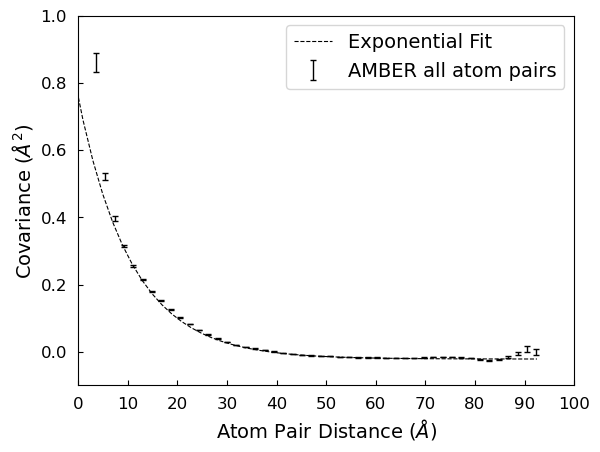

In [41]:
a, g, b = read_parameters("fit.log")

f, ax = plt.subplots()

ax.errorbar(Dist[1:], Cov[1:], yerr=Cov_err[1:], elinewidth=1, capsize=2.5, color="k", linestyle='', label="AMBER all atom pairs")
ax.plot(np.linspace(-5,92.5), a*np.exp(-np.linspace(-5,95)/g)+b, c="k", lw=0.8, ls="--", label="Exponential Fit")
ax.set_xticks(np.arange(0,110,10))
ax.legend(loc="upper right")
ax.set_ylabel(r"Covariance ($\AA^2$)", size=14)
ax.set_xlabel(r"Atom Pair Distance ($\AA$)", size=14)
ax.tick_params(axis="both", direction="in", labelsize=12, pad=8)
ax.set_ylim([-0.1,1]);
ax.set_xlim([0,100]);

The agreement is quite good above about 10 Angstroms.

### Selecting atom-pairs within the protein

What we just plotted was the relationship between atomic covariance and distance for _all atom pairs_ across the whole supercell. In our paper, we show that this relationship also holds for all atom pairs _across_ proteins.

Now we want to see if the same relationship holds for atom pairs _within_ proteins.

In the supercell simulation, each protein is 149 residues long, but the x-ray structural model for the system only contains residues 5-140 because the N- and C-termini are flexible, and were unresolved in by the crystallography. 

We're going to use the X-ray structure to produce a rigid-body motions model for the protein shortly, so to make sure that our predictions from the model can be adequately compared with this model, we're going to compute relationship between atomic covariance and atom-pair separation distance for only the atom-pairs 5-140 of each protein. 

This means selecting the indices associated with residues 5-140 for each 149x149 matrix along the diagonals. Below is the code to select for only those elements, and bin them as before.

In [42]:
# The code block below will issue a RuntimeWarning, this code block suppresses this warning, as it is expected
import warnings
warnings.filterwarnings('ignore')

In [43]:
dist_within = []
covar_within = []
for i in range(32):
    dist_within.append(  dist[i*149+5:i*149+140, i*149+5:i*149+140])
    covar_within.append(covar[i*149+5:i*149+140, i*149+5:i*149+140])

dist_within_scatter = np.array(dist_within).flatten()
covar_within_scatter = np.array(covar_within).flatten()

DistW, CovW, CovW_err = collect_bins(dist_within_scatter, covar_within_scatter);

In [44]:
warnings.filterwarnings('default')

Bins at low separation distance: 0.43 A and 1.29 A


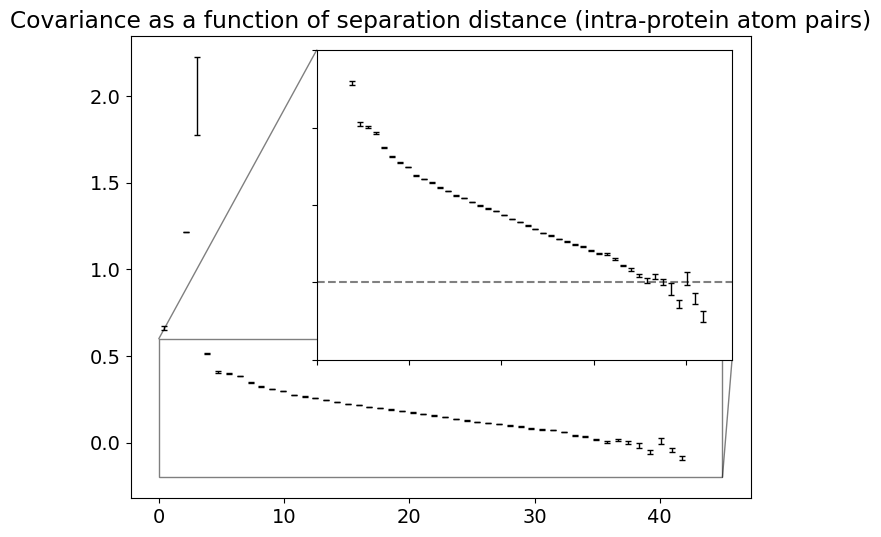

In [45]:
f, ax = plt.subplots(figsize=(8,6))
ax.errorbar(DistW, CovW, yerr=CovW_err,elinewidth=1, capsize=2.5, color="k", linestyle='', label="AMBER all atom pairs")
ax.set_title("Covariance as a function of separation distance (intra-protein atom pairs)")

## INSET ###
axins = ax.inset_axes([0.3, 0.3, 0.67, 0.67])
axins.axhline(0, lw=1.5, ls="--", c="Gray")
axins.errorbar(DistW, CovW, CovW_err, elinewidth=1, capsize=2.5, color="k", linestyle='', label="AMBER all atom pairs");
## sub region of the original image
x1, x2, y1, y2 = 0, 45, -0.2, 0.6
axins.set_xlim(x1, x2);
axins.set_ylim(y1, y2);
axins.set_xticklabels([]);
axins.set_yticklabels([]);
############

ax.indicate_inset_zoom(axins, edgecolor="black");

print("Bins at low separation distance: {:.2f} A and {:.2f} A".format(DistW[0], DistW[1]))

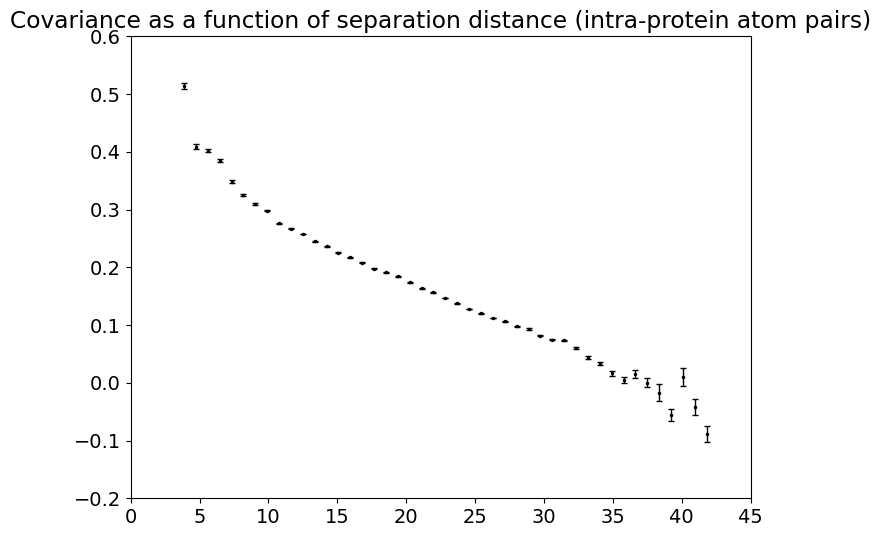

In [46]:
f, ax = plt.subplots(figsize=(8,6))
ax.errorbar(DistW, CovW, yerr=CovW_err, elinewidth=1, capsize=2.5, color="k", marker=".", markersize=3, linestyle='', label="AMBER all atom pairs")
ax.set_xlim([0,45])
ax.set_ylim([-0.2, 0.6])
ax.set_title("Covariance as a function of separation distance (intra-protein atom pairs)");

That doesn't look very exponential. Almost looks linear. In the lecture notes from this talk at the Erice International School of Crystallography, an argument is laid out for why this kind of roughly-linear relationship might be indicative of Rigid-body-motions-like dynamics.

To test to what degree this relationship between atom-pair separation distance and atomic covariance is explained by a rigid body motions model, we'll take the x-ray structure (again, missing residues 1-5 and 141-149) and compute the relationship between atom-pair separation distance and atomic covariance for pure rigid body motions with a particular amount of rotation and translation (specified by a standard deviation in the sampling of euler angles, and a standard deviation of in the sampling of translations along each axis). This is done using the `RigidBodyMotions.py` method in this directory. The `Model` class does all this work for us, and outputs the distance and covariance information on the same scale as the covariance data from the simulation.

In [47]:
warnings.filterwarnings('ignore')

(-0.2, 0.6)

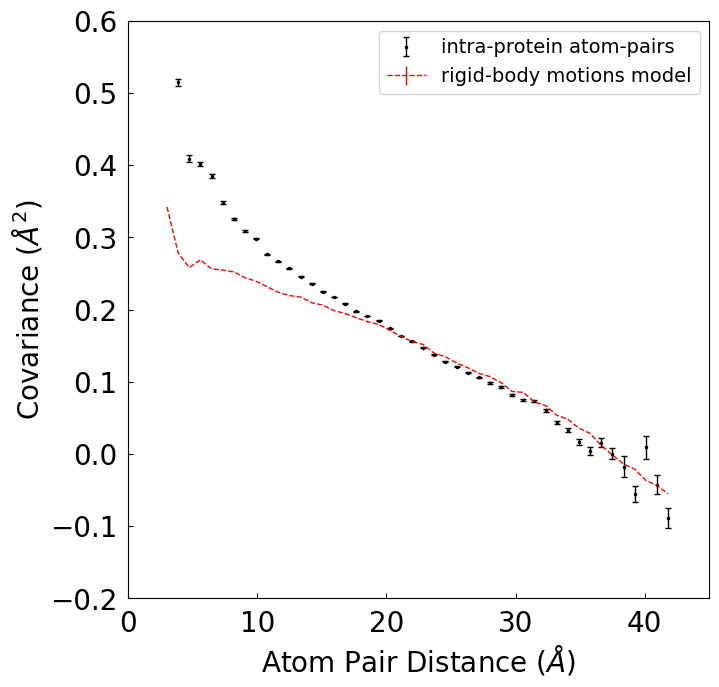

In [48]:
import sys
sys.path.append('./code/')
from RigidBodyMotions import *
DistRBM, CovarRBM, semRBM = Model(dist=DistW, ROT_STD=0.95, TRANS_STD=0.024, N_FRAMES=20000).run()
f, ax = plt.subplots(figsize=(7.5,7.5))
ax.errorbar(DistW, CovW, yerr=CovW_err, elinewidth=1, capsize=2.5, color="k", marker=".", markersize=3, linestyle='', label="intra-protein atom-pairs")
ax.errorbar(DistRBM, 100*CovarRBM, yerr=semRBM, color="r", lw=1, ls="--", label="rigid-body motions model")
ax.legend(loc="upper right");
ax.set_ylabel(r"Covariance ($\AA^2$)", size=20)
ax.set_xlabel(r"Atom Pair Distance ($\AA$)", size=20)
ax.tick_params(axis="both", direction="in", labelsize=20, pad=8)
ax.set_xlim([0,45])
ax.set_ylim([-0.2, 0.6])

In [49]:
warnings.filterwarnings('default')

Hmmm... it looks like the rigid-body motions model explains a lot of the covariance beyond about 20 angstroms, but what about the covariance from 0-20 angstroms?

Let's look at the residual between the two:

(-0.1, 0.3)

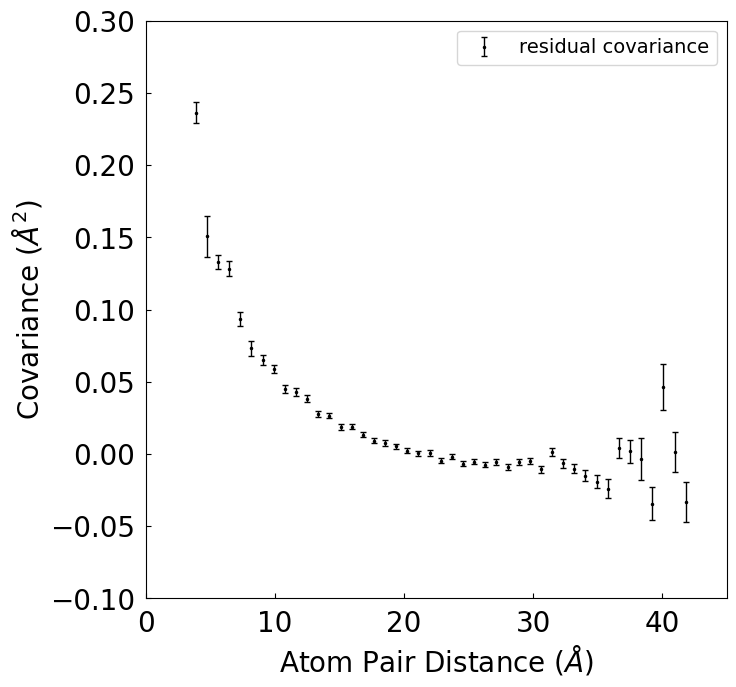

In [50]:
residual = CovW - 100*CovarRBM
residual_err = np.sqrt(np.add(np.power(CovW_err, 2), np.power(100*semRBM, 2)))
f, ax = plt.subplots(figsize=(7.5,7.5))
ax.errorbar(DistW, residual, yerr=residual_err, elinewidth=1, capsize=2.5, color="k", marker=".", markersize=3, linestyle='', label="residual covariance")
ax.legend(loc="upper right");
ax.set_ylabel(r"Covariance ($\AA^2$)", size=20)
ax.set_xlabel(r"Atom Pair Distance ($\AA$)", size=20)
ax.tick_params(axis="both", direction="in", labelsize=20, pad=8)
ax.set_xlim([0,45])
ax.set_ylim([-0.1, 0.3])

That looks more exponential.

Let's output the data again, and fit to an exponential:

In [51]:
output_data(DistW, residual, residual_err, "residual_covar_vs_dist.dat")

In [52]:
with open("fit_residual.gnu", 'w') as g:
    g.write("f(x) = a * exp(-x/g) + b\n")
    g.write("fit f(x) \"residual_covar_vs_dist.dat\" using 1:2:3 via a, g, b\n")

In [53]:
!gnuplot fit_residual.gnu

"fit_residual.gnu" line 2: warning: 
	> Implied independent variable y not found in fit function.
	> Assuming version 4 syntax with zerror in column 3 but no zerror keyword.

iter      chisq       delta/lim  lambda   a             g             b            
   0 7.0593493907e+06   0.00e+00  2.31e+02    1.000000e+00   1.000000e+00   1.000000e+00
   1 5.0034125192e+03  -1.41e+08  2.31e+01    1.002061e+00   1.009248e+00   1.651369e-02
   2 3.0066787221e+03  -6.64e+04  2.31e+00    1.168357e+00   1.770540e+00   8.834462e-03
   * 2.2500979243e+05   9.87e+04  2.31e+01   -2.519495e+00   4.863653e+00   3.301590e-03
   3 1.2996923313e+03  -1.31e+05  2.31e+00    1.325381e+00   2.469092e+00   5.821367e-03
   * 1.6508363958e+04   9.21e+04  2.31e+01   -4.527585e-01   4.128541e+00  -7.898897e-04
   4 9.2774748652e+02  -4.01e+04  2.31e+00    1.072096e+00   2.852314e+00   2.498617e-03
   * 6.1292962042e+03   8.49e+04  2.31e+01   -1.145559e-02   4.389607e+00  -2.602798e-03
   5 6.6153183216e+02  -4.02e

a = 0.420013
g = 5.52069
b = -0.00876279


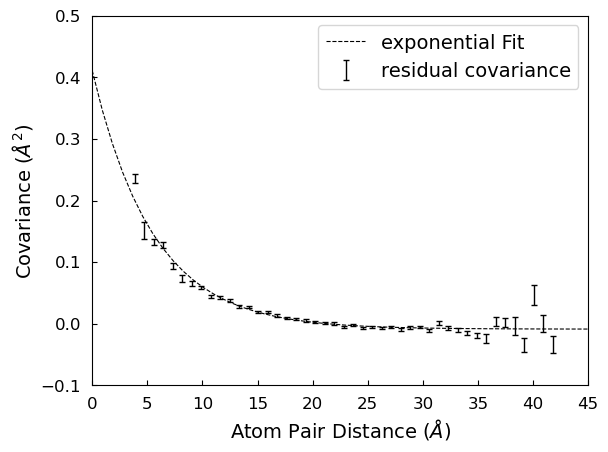

In [54]:
a, g, b = read_parameters("fit.log")

f, ax = plt.subplots()

ax.errorbar(DistW, residual, yerr=residual_err, elinewidth=1, capsize=2.5, color="k", linestyle='', label="residual covariance")
ax.plot(np.linspace(0, 45.0), a*np.exp(-np.linspace(0, 45.0)/g)+b, c="k", lw=0.8, ls="--", label="exponential Fit")
ax.legend(loc="upper right")
ax.set_ylabel(r"Covariance ($\AA^2$)", size=14)
ax.set_xlabel(r"Atom Pair Distance ($\AA$)", size=14)
ax.tick_params(axis="both", direction="in", labelsize=12, pad=8)
ax.set_ylim([-0.1,0.5]);
ax.set_xlim([0,45]);

So, it looks like the relationship between intramolecular atom pair separation distance and atomic covariance is well explained by a combination of rigid-body and liquid like motions.

For more on this, see our paper in [Structural Dynamics](https://aca.scitation.org/doi/10.1063/1.5132692).